## 시각화 라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

- 한글 폰트

In [2]:
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


# 지하철 혼잡도 데이터(2022) 불러오기 
- 서울교통공사 역별 혼잡도 현황 https://data.seoul.go.kr/dataList/OA-12928/F/1/datasetView.do
- 1~8호선만 제공(문의해보니 9호선은 민간이어서 제공안한다함(?))
- 혼잡도: 열차 1량당 정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 
혼잡도 34%로 산정
- 단위 : %, 단위기준 : 열차 1량의 승차인원 = 160명 = 100%
- 일부역 결측치 존재(5시30분, 23시00분, 23시30분 컬럼- 실제운행하지 않는 시간)
  - 분석할 때에는 결측치가 없는 시간대끼리 비교를 할 것인가? 아니면 0으로 둘 것인가?
  - 분석할 때에는 저 시간대는 빼고 비교하겠음
- 이 데이터는 2022년 한 해의 평균 혼잡도를 기재하였으므로 우리가 생각한 변수(시간대, 요일, 기상조건) 중에서 기상조건은 고려하지 않는다.
- 타겟을 정하자. 어느 호선, 어느 역을 기준으로 유의미한 변수를 찾아낼 것인가?
  - 전제 value 중에서 혼잡도가 최대인 값이 포함된 역으로 해볼까?

In [3]:
import pandas as pd
data = pd.read_csv("[지하철_102_raw]_서울교통공사_역별시간대별혼잡도_20221231.csv")
data.head(2)

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,15.6,17.1,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.3,36.1,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0


## 각 행별 최댓값을 가진 컬럼 

In [4]:
# 시간 컬럼 선택
time_column = data.columns[6:]
time_column
# 각 행에서의 최댓값을 가진 컬럼 찾기
max_column = data[time_column].idxmax(axis=1)
# 컬럼 추가
data['최대혼잡시간대'] = max_column
data.head(2)
# 최대혼잡도 추가
data['최대혼잡도'] = data[time_column].max(axis=1)

In [5]:
data_1 = data.copy()
data_1.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2,8시30분,82.7
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0,18시00분,107.8
2,3,평일,1,151,시청,상선,6.6,15.4,14.7,25.0,...,21.8,17.5,18.5,18.4,14.9,11.5,7.0,2.8,18시00분,58.1
3,4,평일,1,151,시청,하선,9.0,9.1,14.6,20.0,...,31.1,28.5,30.2,22.2,15.4,10.1,6.5,0.8,18시00분,105.5
4,5,평일,1,152,종각,상선,6.3,14.4,10.7,17.6,...,29.7,22.6,26.1,24.0,19.7,14.6,9.6,4.2,18시00분,76.1


In [6]:
data_1.sort_values(by=['최대혼잡도'], ascending=False)

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
209,210,평일,4,418,성신여대입구,하선,67.0,42.2,53.5,93.6,...,12.4,15.1,14.3,13.5,9.7,9.4,4.5,4.4,8시00분,185.5
211,212,평일,4,419,한성대입구,하선,53.3,43.5,53.5,88.6,...,14.5,16.6,15.9,14.7,10.5,10.2,4.9,4.4,8시00분,184.5
207,208,평일,4,417,길음,하선,54.6,38.8,52.7,90.2,...,10.1,12.2,11.2,11.1,7.8,7.8,4.4,1.9,8시00분,176.2
71,72,평일,2,226,사당,외선,81.0,54.4,59.5,96.9,...,31.5,27.8,24.6,22.1,21.2,13.0,9.6,6.2,8시30분,172.3
213,214,평일,4,420,혜화,하선,55.3,42.3,52.0,84.9,...,23.6,32.2,35.5,24.2,19.4,15.1,7.9,5.6,8시00분,171.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1461,공휴일,6,2612,역촌,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,1463,공휴일,6,2613,불광,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,1465,공휴일,6,2614,독바위,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,1467,공휴일,6,2615,연신내,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 6호선 상선 중 출발역이 역촌, 불광, 독바위, 연신내, 구산역인 경우는 전체 신간대에 대해 결측치 존재
  - 평일엔 0.0으로 기입, 토요일, 공휴일엔 NaN 기입
  - 단선 운행 때문
  - 삭제하면 됨
  - 아직 삭제 안 함..

In [8]:
data_1[(data_1['요일구분'] == '평일') & (data_1['호선'] == 6) & (data_1['상하구분'] == '상선')].head()
data_1[(data_1['요일구분'] == '토요일') & (data_1['호선'] == 6) & (data_1['상하구분'] == '상선')].head()
data_1[(data_1['요일구분'] == '공휴일') & (data_1['호선'] == 6) & (data_1['상하구분'] == '상선')].head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
1458,1459,공휴일,6,2611,응암,상선,6.0,4.6,5.3,6.1,...,12.6,12.9,16.2,14.2,10.2,5.7,NaN,NaN,10시00분,23.7
1460,1461,공휴일,6,2612,역촌,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,1463,공휴일,6,2613,불광,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,1465,공휴일,6,2614,독바위,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,1467,공휴일,6,2615,연신내,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4호선 데이터 분리
- 최대 혼잡도가 가장 큰 성신여대역(하선)이 포함된 4호선을 가지고 데이터 분석 시행

In [25]:
line_4 = data_1[data_1['호선'] == 4].reset_index()
line_4.head(2)

,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,190,191,평일,4,409,당고개,상선,0.1,5.2,0.9,...,2.2,3.4,4.0,2.6,3.9,4.4,2.6,1.4,18시00분,10.2
1,191,192,평일,4,409,당고개,하선,4.4,5.2,9.0,...,2.3,1.9,1.9,1.6,1.3,1.7,0.7,0.0,8시00분,21.2


## 상하 구분

In [26]:
line_4_up = line_4[line_4['상하구분'] == '상선'].reset_index()
line_4_dn = line_4[line_4['상하구분'] == '하선'].reset_index()
line_4_dn.head(3)

,level_0,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,1,191,192,평일,4,409,당고개,하선,4.4,5.2,...,2.3,1.9,1.9,1.6,1.3,1.7,0.7,0.0,8시00분,21.2
1,3,193,194,평일,4,410,상계,하선,9.7,10.6,...,4.6,3.3,5.0,3.2,2.2,3.2,1.2,0.0,8시00분,38.6
2,5,195,196,평일,4,411,노원,하선,12.1,14.5,...,9.2,8.6,11.0,8.2,6.0,6.5,3.5,0.0,8시00분,56.1


In [27]:
# 필요없는 칼럼 제거
drop_columns = ['level_0', 'index', '연번', '호선', '상하구분', '역번호', '5시30분', '00시00분', '00시30분', '23시30분']
line_4_dn.drop(drop_columns, axis=1, inplace=True)
line_4_dn.head(1)

,요일구분,출발역,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,최대혼잡시간대,최대혼잡도
0,평일,당고개,5.2,9.0,12.7,18.3,21.2,13.0,13.8,9.8,...,2.3,1.9,1.9,2.3,1.9,1.9,1.6,1.3,8시00분,21.2


## 하선
### 4호선 역마다 평일, 토요일, 공휴일 별 최대혼잡시간대

In [28]:
# 4호선 각 역 하루 중 언급된 최대혼잡시간대
line_4_dn.groupby(['요일구분'])['최대혼잡시간대'].value_counts()

요일구분  최대혼잡시간대
공휴일   18시00분      9
      9시30분       6
      10시00분      4
      10시30분      4
      11시00분      3
토요일   17시00분     10
      9시00분      10
      10시00분      3
      11시00분      2
      9시30분       2
      13시00분      1
      16시30분      1
평일    8시00분      14
      18시00분      5
      18시30분      5
      8시30분       2
Name: count, dtype: int64

In [29]:
mean_4week = line_4_dn[line_4_dn['요일구분']=='평일'][['8시00분', '18시00분', '18시30분', '8시30분']].agg(['mean', 'max'])
mean_4sat = line_4_dn[line_4_dn['요일구분']=='토요일'][['17시00분', '9시00분', '11시00분', '9시30분', '13시00분', '16시30분']].agg(['mean', 'max'])
mean_4sun = line_4_dn[line_4_dn['요일구분']=='공휴일'][['18시00분', '9시30분', '10시00분', '10시30분', '11시00분']].agg(['mean', 'max'])

In [30]:
# 4호선 각 역 하루 중 언급된 최대혼잡시간대에서의 평균 혼잡도 및 최대 혼잡도(평일)
mean_4week

,8시00분,18시00분,18시30분,8시30분
mean,86.296154,42.076923,40.05,65.315385
max,185.500000,101.400000,135.30,135.200000


In [31]:
# 4호선 각 역 하루 중 언급된 최대혼잡시간대에서의 평균 혼잡도 및 최대 혼잡도(토요일)
mean_4sat

,17시00분,9시00분,11시00분,9시30분,13시00분,16시30분
mean,41.182759,42.189655,41.244828,41.006897,33.437931,38.903448
max,71.800000,80.900000,74.300000,79.900000,55.400000,70.700000


In [32]:
# 4호선 각 역 하루 중 언급된 최대혼잡시간대에서의 평균 혼잡도 및 최대 혼잡도(공휴일)
mean_4sun

,18시00분,9시30분,10시00분,10시30분,11시00분
mean,29.788462,35.723077,33.953846,33.192308,32.215385
max,44.100000,82.700000,65.200000,61.400000,55.100000


### 하선의 혼잡도 평균

In [88]:
df_1 = line_4_dn[line_4_dn['요일구분']=='평일'].iloc[:, :-2]
df_2 = line_4_dn[line_4_dn['요일구분']=='토요일'].iloc[:, :-2]
df_3 = line_4_dn[line_4_dn['요일구분']=='공휴일'].iloc[:, :-2]
df_1.head(1)

,요일구분,출발역,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
0,평일,당고개,5.2,9.0,12.7,18.3,21.2,13.0,13.8,9.8,...,5.1,3.3,2.3,1.9,1.9,2.3,1.9,1.9,1.6,1.3


In [37]:
count = len(line_4_up[line_4_up['요일구분'] == '평일'])
print("요일구분이 '평일'인 행의 개수:", count)
count = len(line_4_up[line_4_up['요일구분'] == '토요일'])
print("요일구분이 '토요일'인 행의 개수:", count)
count = len(line_4_up[line_4_up['요일구분'] == '공휴일'])
print("요일구분이 '공휴일'인 행의 개수:", count)

요일구분이 '평일'인 행의 개수: 26
요일구분이 '토요일'인 행의 개수: 29
요일구분이 '공휴일'인 행의 개수: 26


In [44]:
line_4_dn.iloc[:26, 2:-2].head(1)

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
0,5.2,9.0,12.7,18.3,21.2,13.0,13.8,9.8,4.8,7.8,...,5.1,3.3,2.3,1.9,1.9,2.3,1.9,1.9,1.6,1.3


In [89]:
# 4호선(하선) 시간대별 혼잡도 평균(평일)
mean_1 = line_4_dn.iloc[:26, 2:-2].mean()
mean_1.head(1)

6시00분    25.538462
dtype: float64

In [90]:
# 4호선(하선) 시간대별 혼잡도 평균(토요일)
mean_2 = line_4_dn.iloc[26:55, 2:-2].mean()
mean_2.head(1)

6시00분    17.517241
dtype: float64

In [91]:
# 4호선(하선) 시간대별 혼잡도 평균(공휴일)
mean_3 = line_4_dn.iloc[55:, 2:-2].mean()
mean_3.head(1)

6시00분    10.023077
dtype: float64

In [72]:
# mean_1, _2, _3 데이터프레임으로 합치기
mean_line4 = pd.concat([mean_1, mean_2, mean_3], axis =1).reset_index().T
mean_line4.rename(columns = mean_line4.iloc[0], inplace=True)
mean_line4.drop(['index'], axis=0, inplace=True)
mean_line4['요일구분'] = ['평일', '토요일', '공휴일']
mean_line4

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,요일구분
0,25.538462,28.930769,45.411538,61.911538,86.296154,65.315385,51.515385,41.496154,30.434615,30.811538,...,25.55,19.476923,16.646154,18.507692,18.573077,20.680769,23.419231,18.853846,15.284615,평일
1,17.517241,16.337931,18.255172,21.513793,29.6,33.482759,42.189655,41.006897,39.806897,41.265517,...,24.186207,23.396552,21.241379,20.431034,24.403448,21.434483,22.631034,21.431034,22.641379,토요일
2,10.023077,9.446154,10.203846,13.523077,19.226923,23.065385,31.207692,35.723077,33.953846,33.192308,...,23.638462,20.853846,20.853846,19.5,20.157692,18.115385,16.611538,15.165385,15.034615,공휴일


### 시각화
- 평일 : 출근 시간대에 혼잡도가 다른 시간대보다 크다.
- 토요일 : 출근 시간이 아닐 때에는 오히려 가장 혼잡도가 크다. 하지만 객관적인 지표로 보면 혼잡하지 않은 수준.
- 공휴일 : 혼잡도에 큰 변동은 없으나 9시, 13시, 18시, 21시 부근에 주변보다 약간 혼잡도가 크게 나왔다.

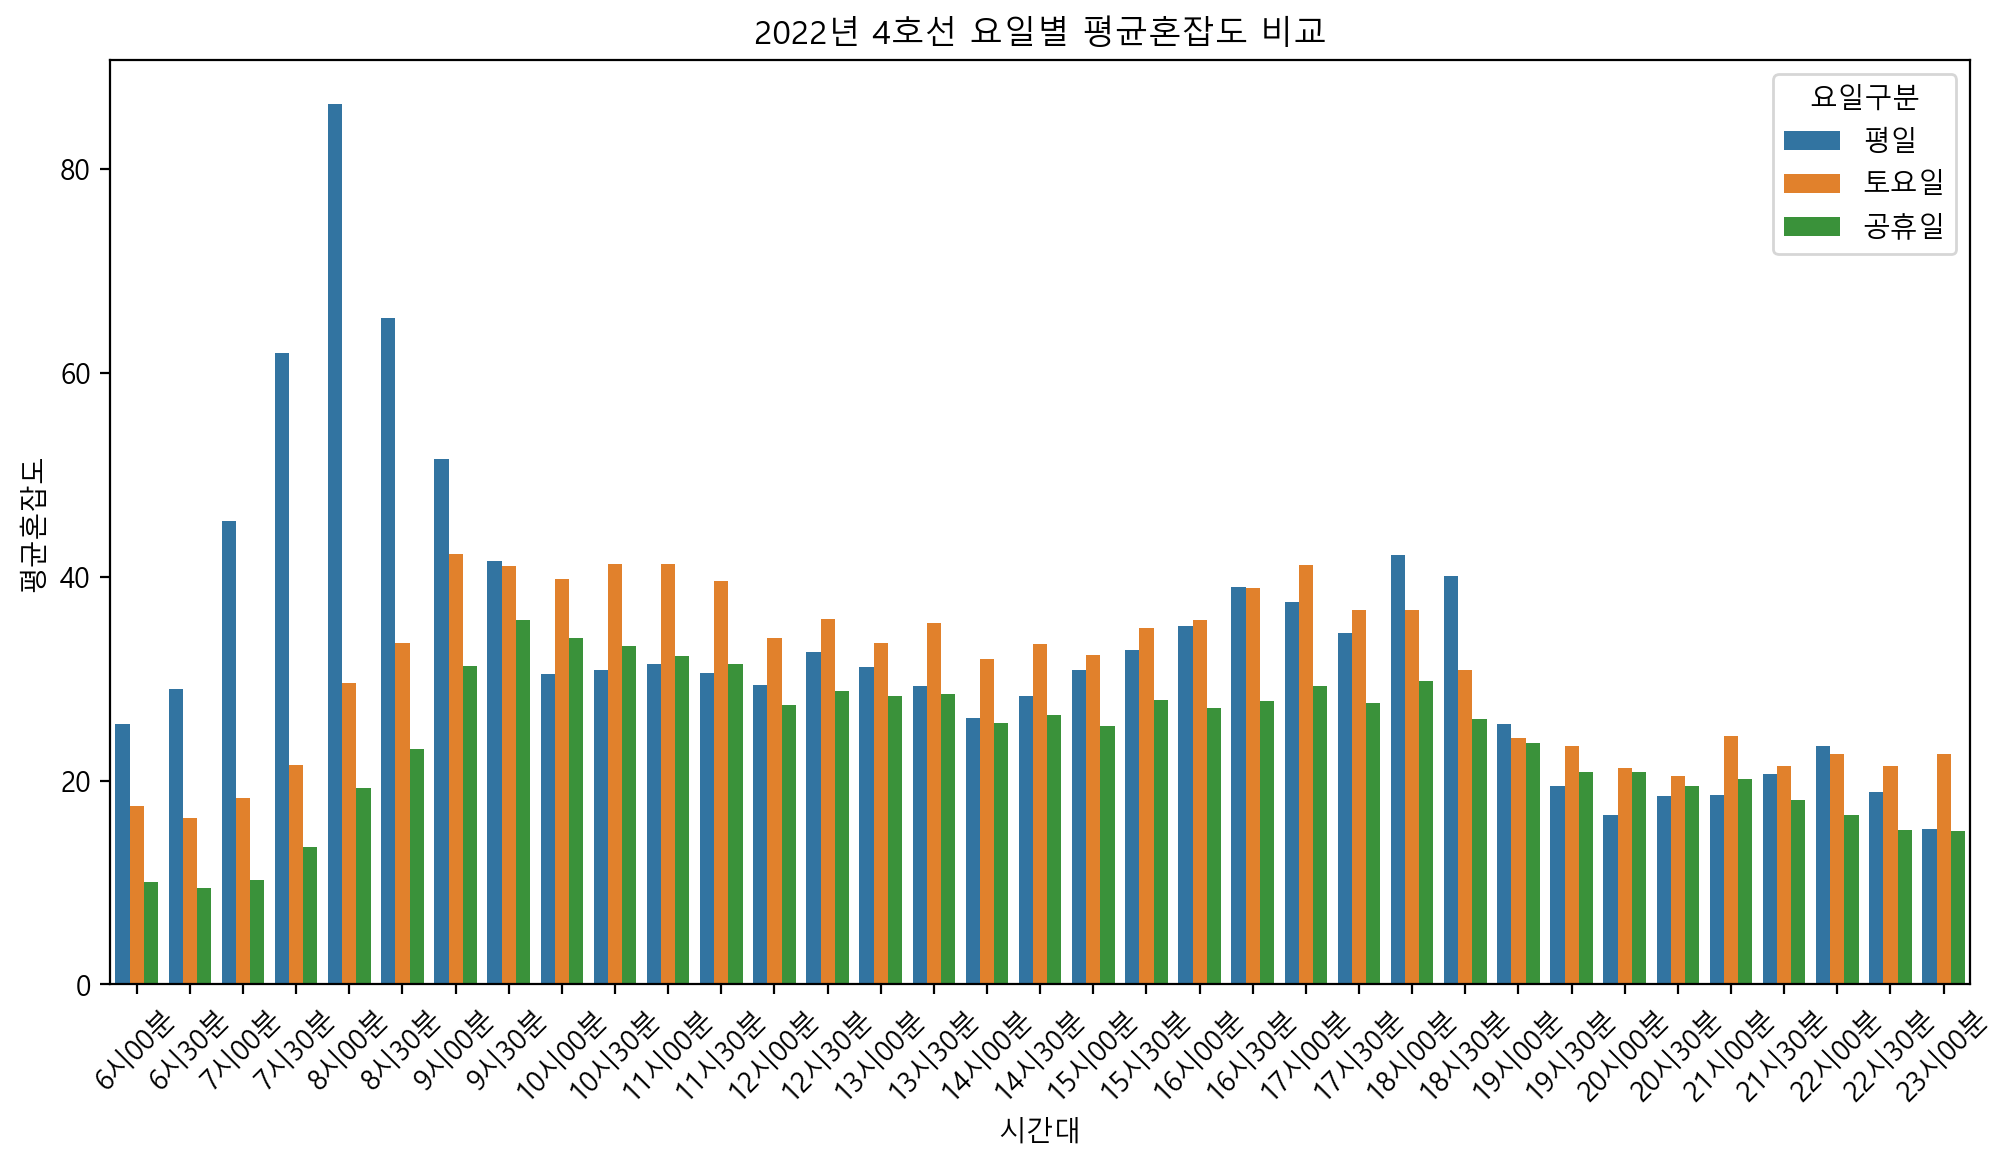

In [75]:
import matplotlib.pyplot as plt

# 데이터프레임을 'melt' 함수를 사용하여 'variable' 열로 변환
melted_df = mean_line4.melt(id_vars="요일구분", var_name="시간대", value_name="평균혼잡도")

# seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 조절
sns.barplot(data=melted_df, x="시간대", y="평균혼잡도", hue="요일구분")
plt.title('2022년 4호선 요일별 평균혼잡도 비교')
plt.ylabel('평균혼잡도')
plt.xlabel('시간대')
plt.xticks(rotation=45)  # X 축 레이블 회전

plt.show()

### 성신여대입구역(하선)에 대해 평일, 토요일, 공휴일 혼잡도 비교

In [92]:
line_4_ss = line_4_dn[line_4_dn['출발역'] == '성신여대입구'].reset_index()
line_4_ss

,index,요일구분,출발역,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,...,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,최대혼잡시간대,최대혼잡도
0,9,평일,성신여대입구,42.2,53.5,93.6,118.1,185.5,128.8,105.2,...,14.3,14.3,12.0,12.4,15.1,14.3,13.5,9.7,8시00분,185.5
1,38,토요일,성신여대입구,30.6,32.5,35.7,42.7,61.0,66.6,79.0,...,20.2,15.3,16.8,16.7,15.4,15.5,17.4,17.0,9시00분,79.0
2,64,공휴일,성신여대입구,15.2,16.9,17.9,23.8,36.0,40.2,50.2,...,18.6,15.9,17.5,15.4,13.7,12.6,13.3,11.7,10시30분,54.1


In [94]:
# 그래프그리기 위한 데이터프레임 정리
drop_ss = ['index', '출발역', '최대혼잡시간대', '최대혼잡도']
df_ss = line_4_ss.drop(columns=drop_ss, inplace=False)
df_ss

,요일구분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
0,평일,42.2,53.5,93.6,118.1,185.5,128.8,105.2,77.3,52.3,...,24.7,18.0,14.3,14.3,12.0,12.4,15.1,14.3,13.5,9.7
1,토요일,30.6,32.5,35.7,42.7,61.0,66.6,79.0,71.2,69.6,...,29.5,19.7,20.2,15.3,16.8,16.7,15.4,15.5,17.4,17.0
2,공휴일,15.2,16.9,17.9,23.8,36.0,40.2,50.2,51.3,52.6,...,26.5,21.4,18.6,15.9,17.5,15.4,13.7,12.6,13.3,11.7


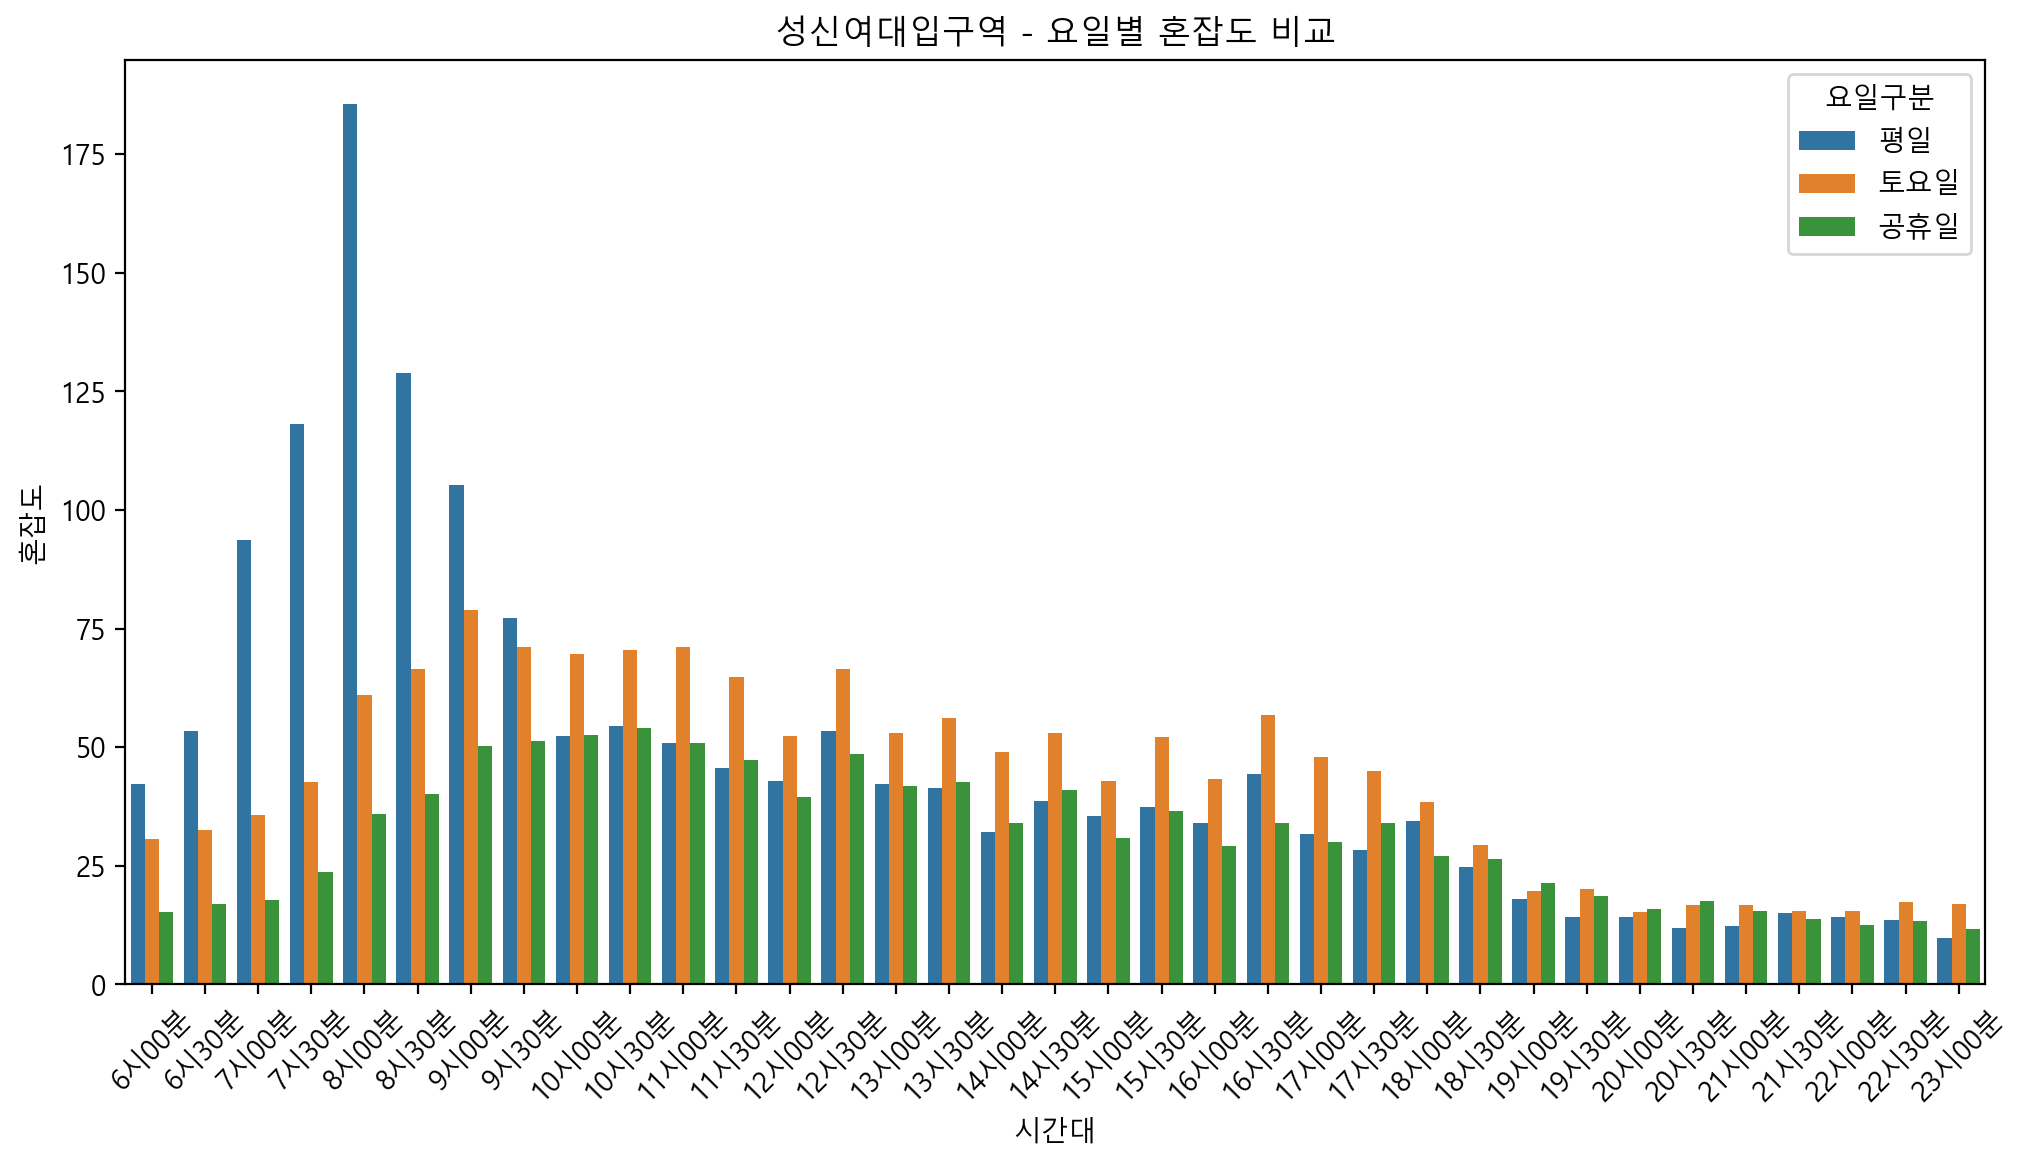

In [96]:
import matplotlib.pyplot as plt

# 데이터프레임을 'melt' 함수를 사용하여 'variable' 열로 변환
melted_df = df_ss.melt(id_vars="요일구분", var_name="시간대", value_name="혼잡도")

# seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 조절
sns.barplot(data=melted_df, x="시간대", y="혼잡도", hue="요일구분")
plt.title('성신여대입구역 - 요일별 혼잡도 비교')
plt.ylabel('혼잡도')
plt.xlabel('시간대')
plt.xticks(rotation=45)  # X 축 레이블 회전

plt.show()


- 성신여대입구역
  - 4호선 하선 방향 역들 : ...-미아-미아사거리-길음-**성신여대입구**-한성대입구-혜화-...
  - 4호선이 서울 중심부를 뚫고 가는 라인이어서 그런지 이용하는 사람들이 몰리는 것 같음.
  - 8시00분 혼잡도 엄청남. 그래서 성신여대입구 쪽 역들은 혼잡도가 큰 편임.
  - 다른 시간대에는 상대적으로 한산하고 평일, 토요일, 공휴일의 큰 차이는 없음.

- 같은 시각(예를 들면 8시?) 4호선 라인의 혼잡도 비교..?

# 시간별 역별 승하차정보 데이터 불러오기
- 구체적으로 들어가보자.
- 2022년 01~12월 데이터 불러오기

In [100]:
## https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보
import requests

url= "http://openapi.seoul.go.kr:8088/69576567536c736f3133357542784147/json/CardSubwayTime/1/1000/202201/"
req = requests.get(url)
print(req)

<Response [200]>


In [105]:
result = []
for m in range(1, 13):
    mon = '2022' + f'{m:02}'
    result.append(mon)
print(result)

['202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212']


In [108]:
import requests
import json
import pandas as pd

# 기본 URL
base_url = "http://openapi.seoul.go.kr:8088/69576567536c736f3133357542784147/json/CardSubwayTime/1/1000/"
data = None
# 연도와 월에 대한 반복문을 사용하여 URL 생성
for year in range(2022, 2023):
    for month in range(1, 13):
        # URL을 생성합니다.
        url = f"{base_url}{year}{month:02}"  # 연도와 월을 두 자리 숫자로 표시하기 위해 :02를 사용합니다.
        
        # 생성된 URL 출력 또는 원하는 작업을 수행할 수 있습니다.
        # print(url)
        req = requests.get(url)
        content = req.json()
        con = content['CardSubwayTime']['row']
        result = pd.DataFrame(con)
        data = pd.concat([data, result])
data = data.reset_index(drop=True)
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   USE_MON                  7353 non-null   object 
 1   LINE_NUM                 7353 non-null   object 
 2   SUB_STA_NM               7353 non-null   object 
 3   FOUR_RIDE_NUM            7353 non-null   float64
 4   FOUR_ALIGHT_NUM          7353 non-null   float64
 5   FIVE_RIDE_NUM            7353 non-null   float64
 6   FIVE_ALIGHT_NUM          7353 non-null   float64
 7   SIX_RIDE_NUM             7353 non-null   float64
 8   SIX_ALIGHT_NUM           7353 non-null   float64
 9   SEVEN_RIDE_NUM           7353 non-null   float64
 10  SEVEN_ALIGHT_NUM         7353 non-null   float64
 11  EIGHT_RIDE_NUM           7353 non-null   float64
 12  EIGHT_ALIGHT_NUM         7353 non-null   float64
 13  NINE_RIDE_NUM            7353 non-null   float64
 14  NINE_ALIGHT_NUM         

In [110]:
data.tail()

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
7348,202212,중앙선,오빈,1.0,0.0,192.0,22.0,456.0,178.0,791.0,...,345.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,20230103
7349,202212,중앙선,양평,27.0,0.0,1501.0,77.0,3230.0,1676.0,7236.0,...,3361.0,80.0,878.0,0.0,0.0,0.0,0.0,0.0,0.0,20230103
7350,202212,중앙선,원덕,49.0,0.0,337.0,3.0,591.0,63.0,688.0,...,272.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,20230103
7351,202212,중앙선,용문,350.0,0.0,714.0,2.0,1828.0,513.0,2983.0,...,1492.0,0.0,797.0,0.0,0.0,0.0,0.0,0.0,0.0,20230103
7352,202212,중앙선,지평,0.0,0.0,0.0,0.0,0.0,0.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20230103


## 4호선 데이터 추출

In [114]:
data = data[data['LINE_NUM'].str.contains('4호선')]
data

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM
99,202201,4호선,수유(강북구청),49.0,5.0,16499.0,2811.0,39433.0,9365.0,94788.0,...,3501.0,17261.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
100,202201,4호선,미아(서울사이버대학),44.0,7.0,8777.0,1156.0,17152.0,4400.0,40215.0,...,1061.0,6292.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
101,202201,4호선,미아사거리,39.0,3.0,12269.0,1688.0,31394.0,6409.0,79514.0,...,2272.0,10315.0,5.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0
102,202201,4호선,길음,27.0,2.0,8200.0,1667.0,24710.0,5762.0,69101.0,...,1620.0,9009.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0
103,202201,4호선,성신여대입구(돈암),15.0,4.0,4719.0,1472.0,14618.0,4929.0,39348.0,...,2822.0,7897.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,202212,4호선,이촌(국립중앙박물관),29.0,2.0,1222.0,840.0,4348.0,6663.0,12206.0,...,1856.0,4990.0,371.0,1471.0,9.0,82.0,0.0,1.0,0.0,0.0
6856,202212,4호선,동작(현충원),6.0,0.0,313.0,125.0,497.0,1608.0,1597.0,...,267.0,565.0,75.0,405.0,5.0,89.0,0.0,0.0,0.0,0.0
6857,202212,4호선,총신대입구(이수),97.0,5.0,5601.0,950.0,15216.0,8895.0,46245.0,...,9341.0,14807.0,1220.0,3539.0,13.0,662.0,0.0,0.0,0.0,0.0
6858,202212,4호선,사당,146.0,57.0,9665.0,1360.0,25048.0,15585.0,68716.0,...,19134.0,21278.0,1995.0,6155.0,18.0,930.0,0.0,32.0,0.0,2.0


## 2022년 1~12월 성신여대입구역 시간대별 승하차 인원 비교
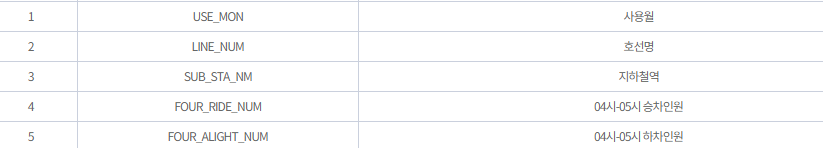

In [121]:
data_s = data[data['SUB_STA_NM'].str.contains('성신여대')]

# 'RIDE'와 'ALIGHT'로 컬럼 분리
ride_columns = [col for col in data_s.columns if 'RIDE' in col]
alight_columns = [col for col in data_s.columns if 'ALIGHT' in col]

# 'RIDE'와 'ALIGHT' 데이터프레임 생성
df_ride = data_s[['USE_MON'] + ride_columns]
df_alight = data_s[['USE_MON'] + alight_columns]

# 결과 출력
print("RIDE 데이터프레임:")
print(df_ride.head(2))

print("ALIGHT 데이터프레임:")
print(df_alight.head(2))

RIDE 데이터프레임:
    USE_MON  FOUR_RIDE_NUM  FIVE_RIDE_NUM  SIX_RIDE_NUM  SEVEN_RIDE_NUM  \
103  202201           15.0         4719.0       14618.0         39348.0   
714  202202           13.0         4129.0       12948.0         33380.0   

     EIGHT_RIDE_NUM  NINE_RIDE_NUM  TEN_RIDE_NUM  ELEVEN_RIDE_NUM  \
103         47820.0        31467.0       24185.0          23930.0   
714         39202.0        25812.0       20716.0          21121.0   

     TWELVE_RIDE_NUM  ...  EIGHTEEN_RIDE_NUM  NINETEEN_RIDE_NUM  \
103          28166.0  ...            38478.0            25207.0   
714          24443.0  ...            33847.0            21810.0   

     TWENTY_RIDE_NUM  TWENTY_ONE_RIDE_NUM  TWENTY_TWO_RIDE_NUM  \
103          26976.0              34458.0              13552.0   
714          21431.0              26669.0              14902.0   

     TWENTY_THREE_RIDE_NUM  MIDNIGHT_RIDE_NUM  ONE_RIDE_NUM  TWO_RIDE_NUM  \
103                 2822.0                2.0           0.0           0.0  

In [122]:
df_ride.head(2)

,USE_MON,FOUR_RIDE_NUM,FIVE_RIDE_NUM,SIX_RIDE_NUM,SEVEN_RIDE_NUM,EIGHT_RIDE_NUM,NINE_RIDE_NUM,TEN_RIDE_NUM,ELEVEN_RIDE_NUM,TWELVE_RIDE_NUM,...,EIGHTEEN_RIDE_NUM,NINETEEN_RIDE_NUM,TWENTY_RIDE_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_THREE_RIDE_NUM,MIDNIGHT_RIDE_NUM,ONE_RIDE_NUM,TWO_RIDE_NUM,THREE_RIDE_NUM
103,202201,15.0,4719.0,14618.0,39348.0,47820.0,31467.0,24185.0,23930.0,28166.0,...,38478.0,25207.0,26976.0,34458.0,13552.0,2822.0,2.0,0.0,0.0,0.0
714,202202,13.0,4129.0,12948.0,33380.0,39202.0,25812.0,20716.0,21121.0,24443.0,...,33847.0,21810.0,21431.0,26669.0,14902.0,2615.0,1.0,1.0,1.0,0.0


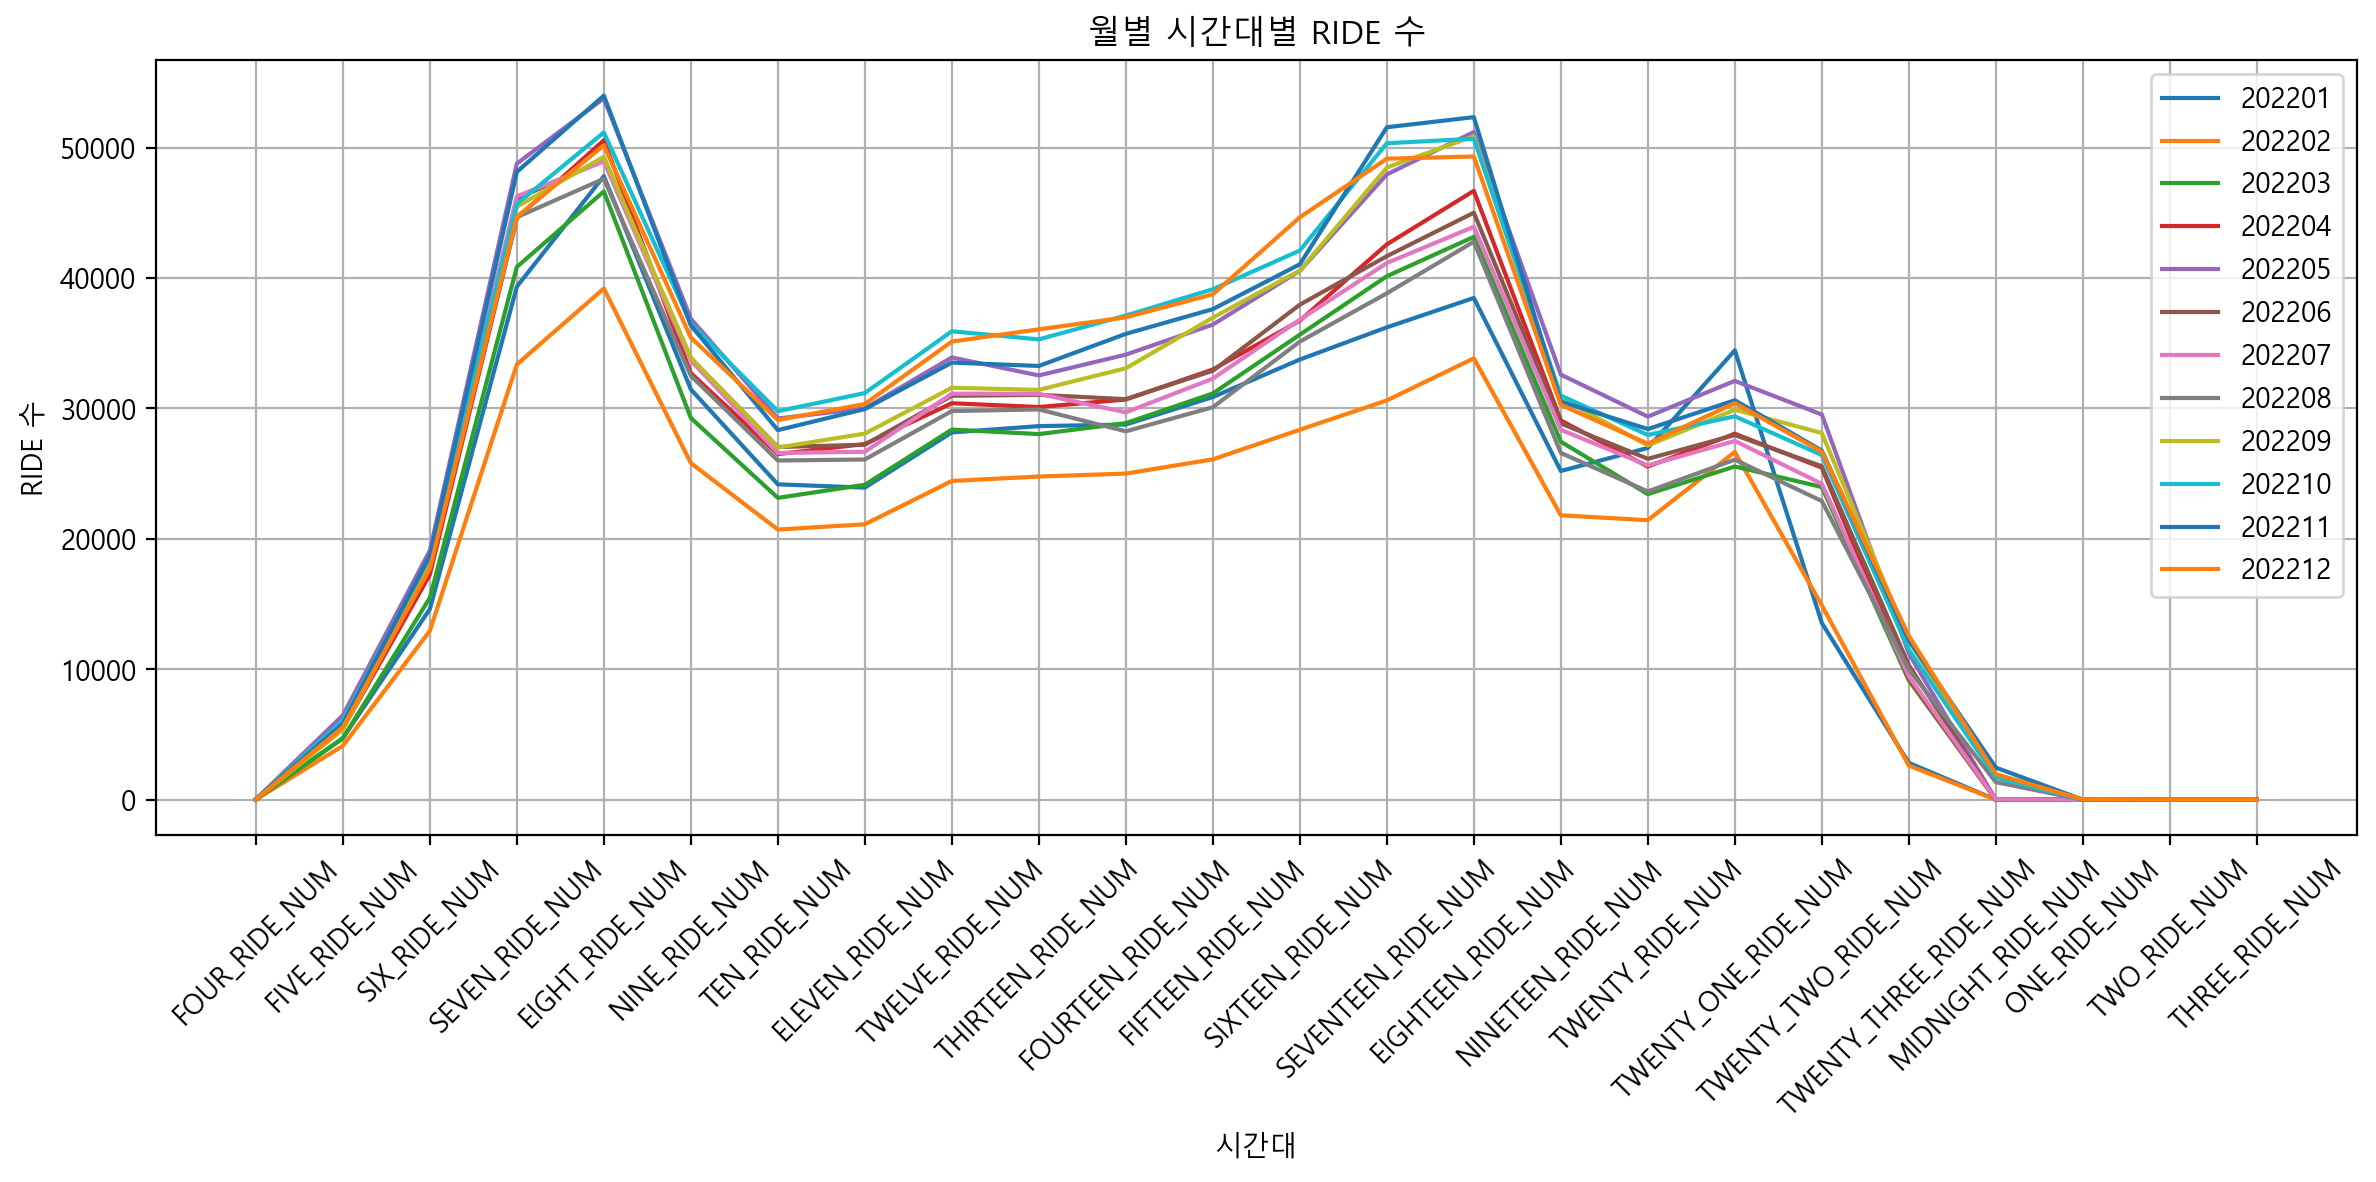

In [123]:
# 월별 시간대별 값을 추출
months = df_ride['USE_MON']
ride_data = df_ride.iloc[:, 1:]  # USE_MON 컬럼을 제외한 나머지 컬럼 선택

# 그래프 생성
plt.figure(figsize=(12, 6))

# 각 월별 시간대별 값을 선 그래프로 그리기
for idx, month in enumerate(months):
    plt.plot(ride_data.columns, ride_data.iloc[idx], label=month)

# 그래프에 제목과 범례 추가
plt.title('월별 시간대별 RIDE 수')
plt.xlabel('시간대')
plt.ylabel('RIDE 수')
plt.legend()

# x축 눈금 라벨 설정 (시간대)
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()